### Out-of-plane Current Density and Magentic Field Lines


In [1]:
import os as os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sdf_helper as sh 
import matplotlib.colors as mcolors 
from matplotlib.ticker import MaxNLocator 
import glob as glob
%matplotlib inline 
from mpl_toolkits.axes_grid1 import make_axes_locatable 

/Users/Conanliptrott/anaconda3/lib/python3.7/site-packages/pandas/compat/_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
hard_drive = '/volumes/My Passport/MMath Project/sim_5_FD'
os.chdir(hard_drive)


data_dir = hard_drive + '/Data/' 
data = sh.getdata(0,data_dir, verbose=False) 
t = data.Last_dump_time_requested.data 
print(t)

0.0


In [5]:
def current_mag_field(d, data_dir): 
    '''Plots the out-of-plane current density and magnetic field lines at user specified date file'''

    data = sh.getdata(d, data_dir, verbose=False) 

    t = data.Last_dump_time_requested.data 
    
    # Plot current density
    g = data.Grid_Grid 
    xb = g.data[0] 
    yb = g.data[1] 
    
    current = data.Current_Jz

    fig, ax = plt.subplots(figsize=(10,5)) 
    
    X, Y = np.meshgrid(xb, yb, indexing='ij') 
    pcm = plt.pcolormesh(X, Y, current.data, cmap='magma') 
    #pcm = plt.pcolormesh(X, -Y, current.data,cmap='magma')  # Uncomment if half-domain simulated  
    
    # Plot magentic field field lines
    g = data.Grid_Grid_mid 
    xc = g.data[0] 
    yc = g.data[1] 
    X, Y = np.meshgrid(xc, yc) 
    
    Bxc = data.Magnetic_Field_Bx_centred
    Byc = data.Magnetic_Field_By_centred
    
    # seed_points = np.array([[0,0,0,0], [0.015, 0.025, 0.035, 0.045]]) # Uncomment if specific starting points required 
    mf1 = ax.streamplot(X,Y,np.transpose(Bxc.data), np.transpose(Byc.data), color='white', minlength=0.1, density=1) # Adjust density and min length if zooming in 
    #mf1 = ax.streamplot(X,-Y,np.transpose(Bxc.data), np.transpose(Byc.data), color='white') 
    
    
    # Format plot
    cbar = fig.colorbar(pcm, pad=0.01)
    cbar.set_label(r'$J_y$', size=15)
    
    # Must specify domain to plot since streamplot adds dimension
    plt.ylim(-0.5, 0.5)
    plt.xlim(-0.5, 0.5)
    
    plt.xlabel(r'x', size=15)
    plt.ylabel(r'z', size=15)
    
    plt.title(r'Current Density $J_y$ and Magnetic Field Lines at Time $t=$'+f'{t}', size=15)
    print(t)
    plt.show()
    
    return fig

0.04


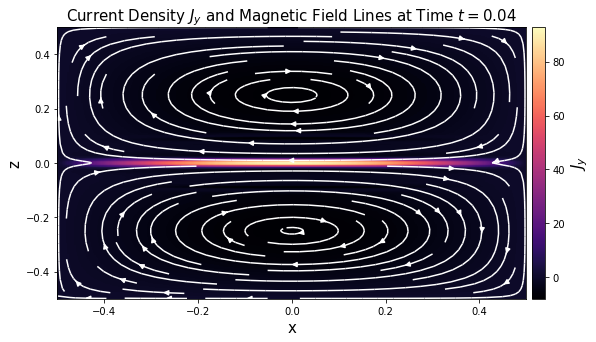

In [6]:
fig = current_mag_field(2, data_dir)
#fig.savefig('sweet_parker_geom_FD.png')